In [1]:
import pickle
from pprint import pprint
import pandas as pd

## 전처리 한 데이터 불러오기

In [2]:
with open("D:/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         DATE  STAR                                             REVIEW  LIKE
0  2020-01-07     1          오류 자체 오류 이용 자수 결제 툭하면 점검 충전 체크카드 출금 충전 금액     0
1  2020-01-07     5                          국굿 아이폰 바코드 큐알 코드 결제 가능 최고     0
2  2020-01-07     3                           현상 사용 오늘 업데이트 접속 화면 바탕화면     0
3  2020-01-07     2        설치 아이폰 설치 아버지 설치 갤럭시 노트 부산 지역화폐 설치 사용 버전 설치     0
4  2020-01-07     4  개선 사항 요청 본인 인증 수단 공인 인증서 추가 어머니 발급 어머니 핸드폰 명의 ...     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2266 non-null   object
 1   STAR    2266 non-null   int64 
 2   REVIEW  2266 non-null   object
 3   LIKE    2266 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 70.9+ KB
None


In [3]:
df1 = pd.read_csv("D:/word cloud nouns_negative (1).csv")

In [4]:
df2 = pd.read_csv("D:/word cloud nouns_positive (1).csv")

In [5]:
print(df1.info())
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12569 entries, 0 to 12568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12569 non-null  object
dtypes: object(1)
memory usage: 98.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3912 non-null   object
dtypes: object(1)
memory usage: 30.7+ KB
None


In [6]:
df2

,0
0,포인트
1,여기저기
2,사용
3,부산
4,경제
...,...
3907,계속
3908,대기
3909,이제
3910,잔액


In [7]:
## 긍정 부정 나누기
data_positive = data[data['STAR'] > 3] # 긍정 리뷰
data_negative = data[data['STAR'] < 3] # 부정 리뷰

In [8]:
## 나눈 시점부터 리뷰 가져오기
slice0 = [review for review in list(df1["0"])]
slice1 = [review for review in list(df2["0"])]

## 긍정리뷰

### 워드 클라우드

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = slice0
tfidf = TfidfVectorizer(max_features=1000)
tdm = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()
dense = tdm.todense()
lst1 = dense.tolist()

In [189]:
word_count = pd.DataFrame(lst1,columns = feature_names)
word_count.T.sum(axis=1)

10프로      4.0
가게       10.0
가끔        2.0
가능      131.0
가독성       9.0
        ...  
회원       12.0
회원가입     12.0
효율        2.0
후불        4.0
휴대폰      15.0
Length: 1000, dtype: float64

In [190]:
wc = pd.DataFrame({'단어': tfidf.get_feature_names(), 
                    '빈도': tdm.sum(axis=0).flat})

In [191]:
wc.sort_values('빈도', ascending=False).head(10)

,단어,빈도
883,카드,675.0
390,사용,505.0
371,불편,315.0
305,발급,251.0
879,충전,223.0
116,기존,213.0
41,결제,178.0
91,금액,168.0
986,확인,141.0
3,가능,131.0


In [192]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(0,10),np.random.randint(50,70),np.random.randint(40,60)))

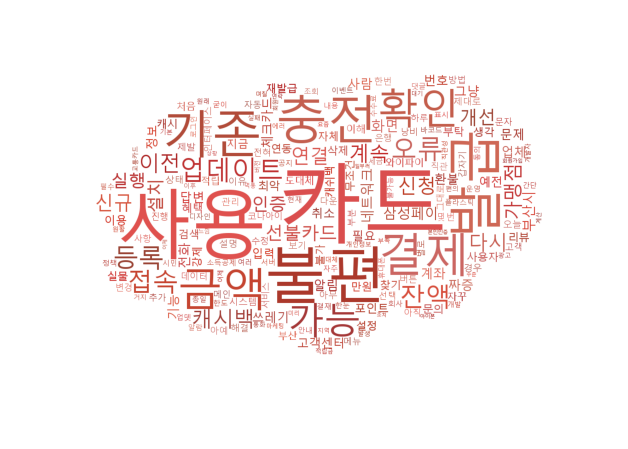

In [193]:
from wordcloud import WordCloud ,ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image


custom_mask = np.array(Image.open("D:/연구알바/cloud.png"))
wc = word_count.T.sum(axis=1)


image_colors = ImageColorGenerator(custom_mask) # 마스크용 사진의 색을 입력

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,
                      #stopwords=STOPWORDS,
                      mask = custom_mask,
                      color_func = color_func,
                      
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- 참고 : https://www.python2.net/questions-683517.htm

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = slice1
tfidf = TfidfVectorizer(max_features=1000)
tdm = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()
dense = tdm.todense()
lst1 = dense.tolist()

In [197]:
word_count = pd.DataFrame(lst1,columns = feature_names)
word_count.T.sum(axis=1)

10프로     26.0
6프로       2.0
가게        8.0
가격        2.0
가계        3.0
         ... 
후기        1.0
후불        3.0
훨신        2.0
휴대폰       6.0
휴대폰번호     1.0
Length: 1000, dtype: float64

In [198]:
wc = pd.DataFrame({'단어': tfidf.get_feature_names(), 
                    '빈도': tdm.sum(axis=0).flat})

In [199]:
wc.sort_values('빈도', ascending=False).head(10)

,단어,빈도
398,사용,268.0
863,카드,145.0
873,캐시백,72.0
366,부산,70.0
910,편리,62.0
855,충전,57.0
10,가맹점,53.0
841,최고,50.0
724,적립,47.0
377,불편,44.0


In [200]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(225,240),np.random.randint(50,70),np.random.randint(40,60)))

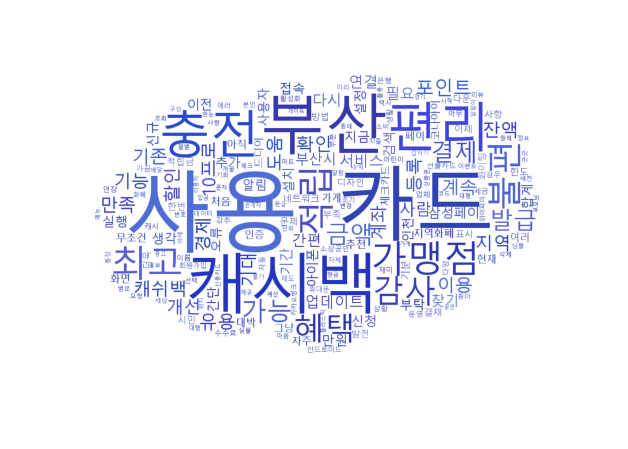

In [206]:
from wordcloud import WordCloud

custom_mask = np.array(Image.open("D:/연구알바/cloud.png"))
wc = word_count.T.sum(axis=1)




# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      mask = custom_mask,
                      color_func = color_func,
                      
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()